## Sanity Check for meta.csv vs wav files

In [ ]:
import os
import pandas as pd

def check_files_in_directory(csv_file, directory):
    # Step 1: Read the CSV file
    df = pd.read_csv(csv_file, delimiter='\t')
    print(df)
    # Step 2: List files in the directory
    files_in_directory = os.listdir(directory)
    
    # Step 3: Compare file names
    missing_files = []
    for file_name in df['filename']:
        file_name = os.path.basename(file_name)  # Extract filename from path
        if file_name not in files_in_directory:
            missing_files.append(file_name)
    
    # Step 4: Report results
    if len(missing_files) == 0:
        print("All files described in the CSV are present in the directory.")
    else:
        print("The following files are missing from the directory:")
        for missing_file in missing_files:
            print(missing_file)

# Example usage:
csv_file = "D:\Sean\DCASE\datasets\Extract_to_Folder\TAU-urban-acoustic-scenes-2022-mobile-development\meta.csv"
directory = "D:\Sean\DCASE\datasets\Extract_to_Folder\TAU-urban-acoustic-scenes-2022-mobile-development\\audio"
check_files_in_directory(csv_file, directory)


## Saving Logit values from output.csv

In [ ]:
import torch
import pandas as pd
# Specify the path to the logits file




# Define the path to the CSV file
csv_file = "D:\Sean\github\dcase2024_task1\predictions\\1ea864zz\output.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file,delimiter='\t')

# Extract only the logit values from the DataFrame
logits = df.iloc[:, 2:].values  # Assuming the logits start from the third column

# Convert the logits to a PyTorch tensor
logits_tensor = torch.tensor(logits, dtype=torch.float32)

# Define the path to save the logits as a .pt file
pt_file = "D:\Sean\github\dcase2024_task1\predictions\\1ea864zz\logits.pt"

# Save the logits tensor to the .pt file
torch.save(logits_tensor, pt_file)

print("Logits saved to", pt_file)

# Load the saved logits from the .pt file
loaded_logits = torch.load(pt_file)

# Print the loaded logits tensor
print("Loaded logits:")
print(loaded_logits)


## WANDB API Get Run data

Run: FocusNet_DSP1_aug5


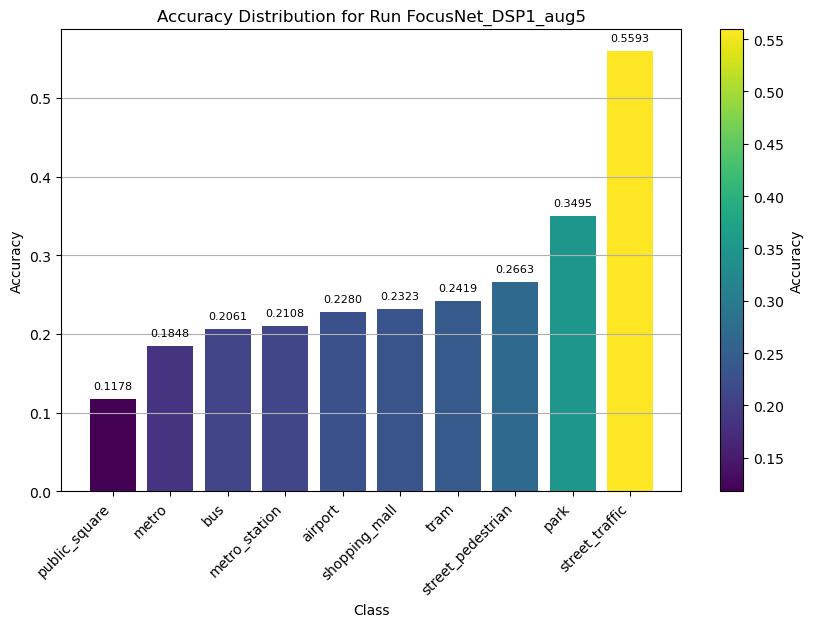


Run: FocusNet_Ali1_aug5


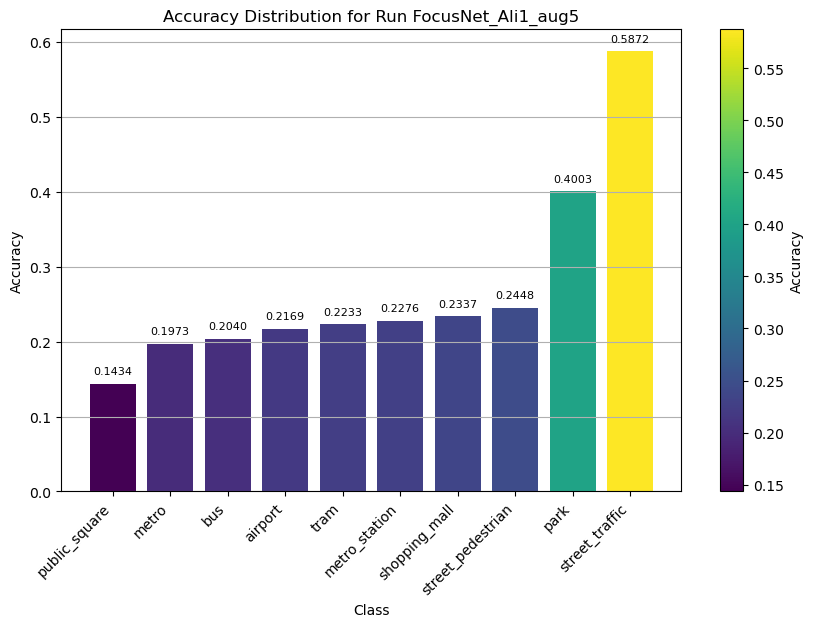


Run: FocusNet_DSP1_aug5
Run: FocusNet_Ali1_aug5
Average Accuracy overall: 0.26377275213599205


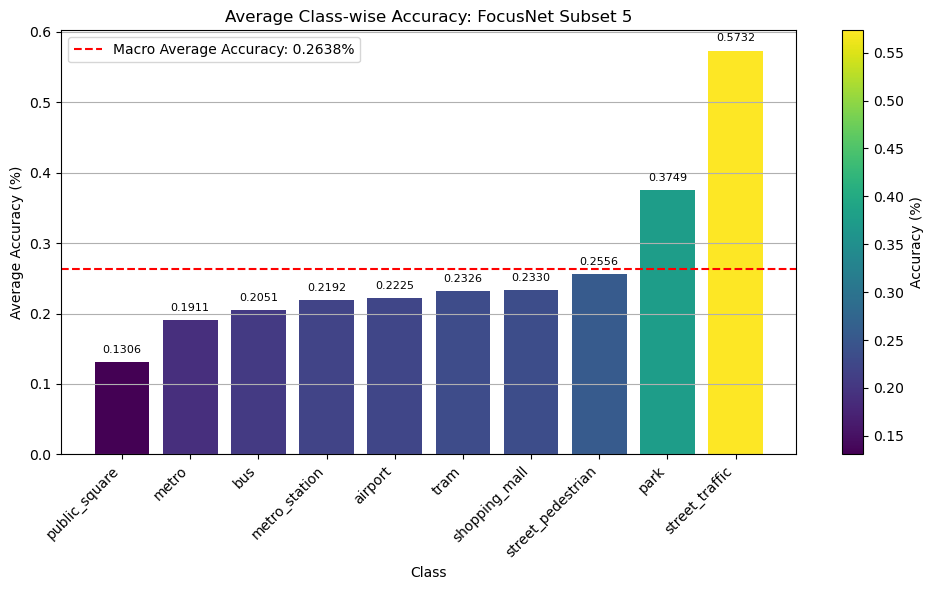

In [2]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Define the entity and project
entity, project = "seanyeo300", "DCASE24_Task1"

# List of run IDs to extract
run_id_list = ["srq5lv8d", "24r6wnps"]

# Initialize the WandB API
api = wandb.Api()

summary_list, name_list = [], []

# Iterate through the run_id_list
for run_id in run_id_list:
    # Fetch the run from the API
    run = api.run(f"{entity}/{project}/{run_id}")

    # Append relevant information to respective lists
    summary_list.append(run.summary._json_dict)
    name_list.append(run.name)

# Create a DataFrame from the collected information
runs_df = pd.DataFrame(
    {"summary": summary_list, "name": name_list},
    index=name_list  # Set the index to the run IDs
)

# List of classes to plot histograms for
classes_to_plot = [
    "airport", "bus", "street_pedestrian", "street_traffic",
    "shopping_mall", "park", "tram", "public_square",
    "metro", "metro_station"
]

# Access the dictionaries in the "summary" column
for name, summary_dict in runs_df["summary"].items():
    print(f"Run: {name}")
    
    # Initialize a figure for the histograms
    plt.figure(figsize=(10, 6))
    
    # Initialize lists to store accuracy values and class names
    accuracy_values = []
    class_names = []
    
    # Iterate over each class to plot its accuracy histogram
    for class_name in classes_to_plot:
        key = f"test/acc.{class_name}"  # Generate the key for the accuracy of the current class
        if key in summary_dict:  # Check if the key exists in the summary dictionary
            # Append accuracy value of the current class to the list
            accuracy_values.append(summary_dict[key])
            class_names.append(class_name)
    
    # Sort the class names based on accuracy values
    sorted_indices = sorted(range(len(accuracy_values)), key=lambda i: accuracy_values[i])
    sorted_class_names = [class_names[i] for i in sorted_indices]
    sorted_accuracy_values = [accuracy_values[i] for i in sorted_indices]
    
    # Set up color map and normalize
    color_map = plt.cm.viridis
    norm = Normalize(vmin=min(sorted_accuracy_values), vmax=max(sorted_accuracy_values))
    color_intensities = [norm(accuracy) for accuracy in sorted_accuracy_values]
    
    # Plot a bar chart for the accuracy values of each class
    bars = plt.bar(sorted_class_names, sorted_accuracy_values, color=color_map(color_intensities))
    
    # Add labels and title
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Distribution for Run {name}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    # Add text annotations to the bars
    for bar, accuracy in zip(bars, sorted_accuracy_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{accuracy:.4f}", ha='center', va='bottom', fontsize=8)
    
    # Remove vertical gridlines
    plt.grid(axis='y')
    
    # Add color bar for reference
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=plt.gca())
    cbar.set_label('Accuracy')
    
    plt.show()
    print()  # For visual separation

# List of classes to plot histograms for
classes_to_plot = [
    "airport", "bus", "street_pedestrian", "street_traffic",
    "shopping_mall", "park", "tram", "public_square",
    "metro", "metro_station"
]

# Initialize lists to store accuracy values for all models
all_model_accuracy_values = [[] for _ in range(len(classes_to_plot))]

# Access the dictionaries in the "summary" column
for name, summary_dict in runs_df["summary"].items():
    print(f"Run: {name}")
    
    # Iterate over each class to collect accuracy values for all models
    for i, class_name in enumerate(classes_to_plot):
        key = f"test/acc.{class_name}"  # Generate the key for the accuracy of the current class
        if key in summary_dict:  # Check if the key exists in the summary dictionary
            all_model_accuracy_values[i].append(summary_dict[key])

# Calculate average accuracy for each class across all models
avg_accuracies_all_models = [sum(accuracies) / len(accuracies) for accuracies in all_model_accuracy_values]
print(f"Average Accuracy overall: {sum(avg_accuracies_all_models)/len(avg_accuracies_all_models)}")
# Sort classes in ascending order of average accuracy
sorted_indices = sorted(range(len(avg_accuracies_all_models)), key=lambda i: avg_accuracies_all_models[i])
sorted_classes = [classes_to_plot[i] for i in sorted_indices]
sorted_avg_accuracies = [avg_accuracies_all_models[i] for i in sorted_indices]

# Set up color map and normalize
color_map = plt.cm.viridis
norm = Normalize(vmin=min(sorted_avg_accuracies), vmax=max(sorted_avg_accuracies))
color_intensities = [norm(accuracy) for accuracy in sorted_avg_accuracies]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_classes, sorted_avg_accuracies, color=color_map(color_intensities))
plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Class-wise Accuracy: FocusNet Subset 5')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add text annotations to the bars
for bar, accuracy in zip(bars, sorted_avg_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{accuracy:.4f}", ha='center', va='bottom', fontsize=8)

# Add color bar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=plt.gca())
cbar.set_label('Accuracy (%)')

# Add line representing the average macro accuracy
avg_macro_accuracy = sum(avg_accuracies_all_models) / len(avg_accuracies_all_models)
plt.axhline(y=avg_macro_accuracy, color='r', linestyle='--', label=f'Macro Average Accuracy: {avg_macro_accuracy:.4f}%')
plt.legend()

plt.tight_layout()
plt.show()


## Plotting Manually

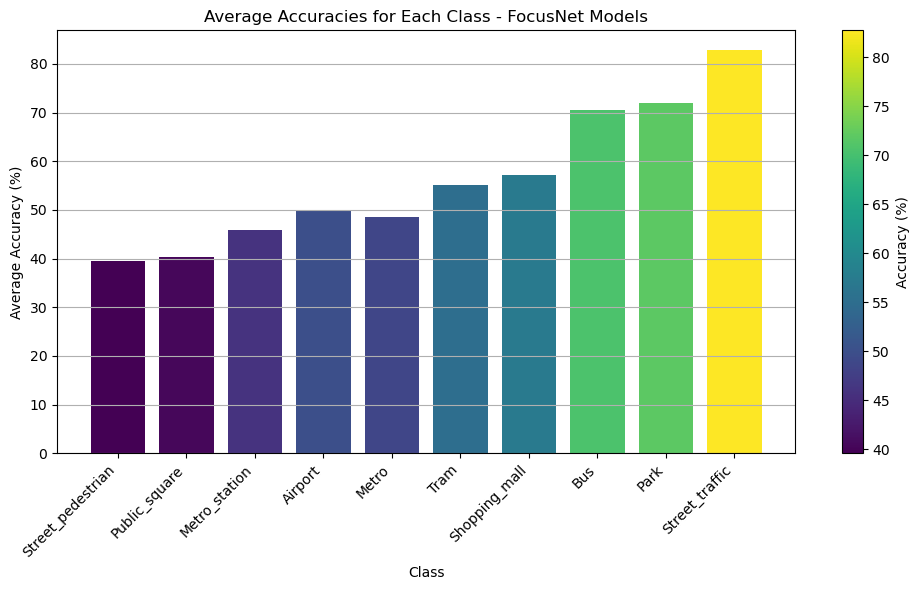

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# FocusNet 1 results
focusnet1 = {
    'Street_pedestrian': 40.10,
    'Public_square': 41.11,
    'Metro_station': 45.56,
    'Airport': 49.12,
    'Metro': 49.90,
    'Tram': 53.82,
    'Shopping_mall': 56.46,
    'Bus': 68.78,
    'Park': 71.95,
    'Street_traffic': 81.88
}

# FocusNet 2 results
focusnet2 = {
    'Street_pedestrian': 39.10,
    'Public_square': 39.46,
    'Metro_station': 46.29,
    'Metro': 47.34,
    'Airport': 50.84,
    'Tram': 56.32,
    'Shopping_mall': 57.81,
    'Park': 71.95,
    'Bus': 72.29,
    'Street_traffic': 83.60
}

# Average accuracies for each class
classes = list(focusnet1.keys())
avg_accuracies = [(focusnet1[class_] + focusnet2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies
color_map = plt.cm.viridis
norm = Normalize(vmin=min(avg_accuracies), vmax=max(avg_accuracies))
color_intensities = [norm(accuracy) for accuracy in avg_accuracies]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, avg_accuracies, color=color_map(color_intensities))
plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class - FocusNet Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=plt.gca())
cbar.set_label('Accuracy (%)')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Baseline 1 results
baseline1 = {
    'Public_square': 40.06,
    'Street_pedestrian': 41.44,
    'Metro_station': 45.56,
    'Metro': 48.79,
    'Airport': 51.75,
    'Shopping_mall': 58.38,
    'Tram': 58.01,
    'Bus': 74.07,
    'Park': 78.58,
    'Street_traffic': 81.61
}

# Baseline 2 results
baseline2 = {
    'Public_square': 33.74,
    'Street_pedestrian': 44.14,
    'Airport': 46.59,
    'Metro': 49.73,
    'Metro_station': 51.82,
    'Shopping_mall': 58.45,
    'Tram': 65.07,
    'Bus': 72.09,
    'Park': 77.54,
    'Street_traffic': 81.18
}

# FocusNet 1 results
focusnet1 = {
    'Street_pedestrian': 40.10,
    'Public_square': 41.11,
    'Metro_station': 45.56,
    'Airport': 49.12,
    'Metro': 49.90,
    'Tram': 53.82,
    'Shopping_mall': 56.46,
    'Bus': 68.78,
    'Park': 71.95,
    'Street_traffic': 81.88
}

# FocusNet 2 results
focusnet2 = {
    'Street_pedestrian': 39.10,
    'Public_square': 39.46,
    'Metro_station': 46.29,
    'Metro': 47.34,
    'Airport': 50.84,
    'Tram': 56.32,
    'Shopping_mall': 57.81,
    'Park': 71.95,
    'Bus': 72.29,
    'Street_traffic': 83.60
}

# Average accuracies for each class across Baseline models
avg_baseline_accuracies = [(baseline1[class_] + baseline2[class_]) / 2 for class_ in classes]

# Average accuracies for each class across FocusNet models
avg_focusnet_accuracies = [(focusnet1[class_] + focusnet2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies for Baseline models
baseline_color_map = plt.cm.viridis
baseline_norm = Normalize(vmin=min(avg_baseline_accuracies), vmax=max(avg_baseline_accuracies))
baseline_color_intensities = [baseline_norm(accuracy) for accuracy in avg_baseline_accuracies]

# Calculate color intensity based on average accuracies for FocusNet models
focusnet_color_map = plt.cm.magma_r
focusnet_norm = Normalize(vmin=min(avg_focusnet_accuracies), vmax=max(avg_focusnet_accuracies))
focusnet_color_intensities = [focusnet_norm(accuracy) for accuracy in avg_focusnet_accuracies]

# Plotting
plt.figure(figsize=(12, 6))

# Plot Baseline models
plt.bar(classes, avg_baseline_accuracies, color=baseline_color_map(baseline_color_intensities), label='Baseline Models')

# Plot FocusNet models
plt.bar(classes, avg_focusnet_accuracies, color=focusnet_color_map(focusnet_color_intensities), label='FocusNet Models', alpha=0.7)

plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar_baseline = plt.colorbar(plt.cm.ScalarMappable(norm=baseline_norm, cmap=baseline_color_map), ax=plt.gca(), pad=0.1)
cbar_baseline.set_label('Baseline Accuracy (%)')

cbar_focusnet = plt.colorbar(plt.cm.ScalarMappable(norm=focusnet_norm, cmap=focusnet_color_map), ax=plt.gca(), pad=0.15)
cbar_focusnet.set_label('FocusNet Accuracy (%)')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Baseline 1 results
baseline1 = {
    'Public_square': 40.06,
    'Street_pedestrian': 41.44,
    'Metro_station': 45.56,
    'Metro': 48.79,
    'Airport': 51.75,
    'Shopping_mall': 58.38,
    'Tram': 58.01,
    'Bus': 74.07,
    'Park': 78.58,
    'Street_traffic': 81.61
}

# Baseline 2 results
baseline2 = {
    'Public_square': 33.74,
    'Street_pedestrian': 44.14,
    'Airport': 46.59,
    'Metro': 49.73,
    'Metro_station': 51.82,
    'Shopping_mall': 58.45,
    'Tram': 65.07,
    'Bus': 72.09,
    'Park': 77.54,
    'Street_traffic': 81.18
}

# Average accuracies for each class across Baseline models
avg_baseline_accuracies = [(baseline1[class_] + baseline2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies for Baseline models
baseline_color_map = plt.cm.viridis
baseline_norm = Normalize(vmin=min(avg_baseline_accuracies), vmax=max(avg_baseline_accuracies))
baseline_color_intensities = [baseline_norm(accuracy) for accuracy in avg_baseline_accuracies]


# Plotting
plt.figure(figsize=(12, 6))

# Plot Baseline models
plt.bar(classes, avg_baseline_accuracies, color=baseline_color_map(baseline_color_intensities), label='Baseline Models')

plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class - DCASE 2024 Baseline Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar_baseline = plt.colorbar(plt.cm.ScalarMappable(norm=baseline_norm, cmap=baseline_color_map), ax=plt.gca(), pad=0.1)
cbar_baseline.set_label('Baseline Accuracy (%)')

plt.tight_layout()
plt.show()


## Assignement Scripts


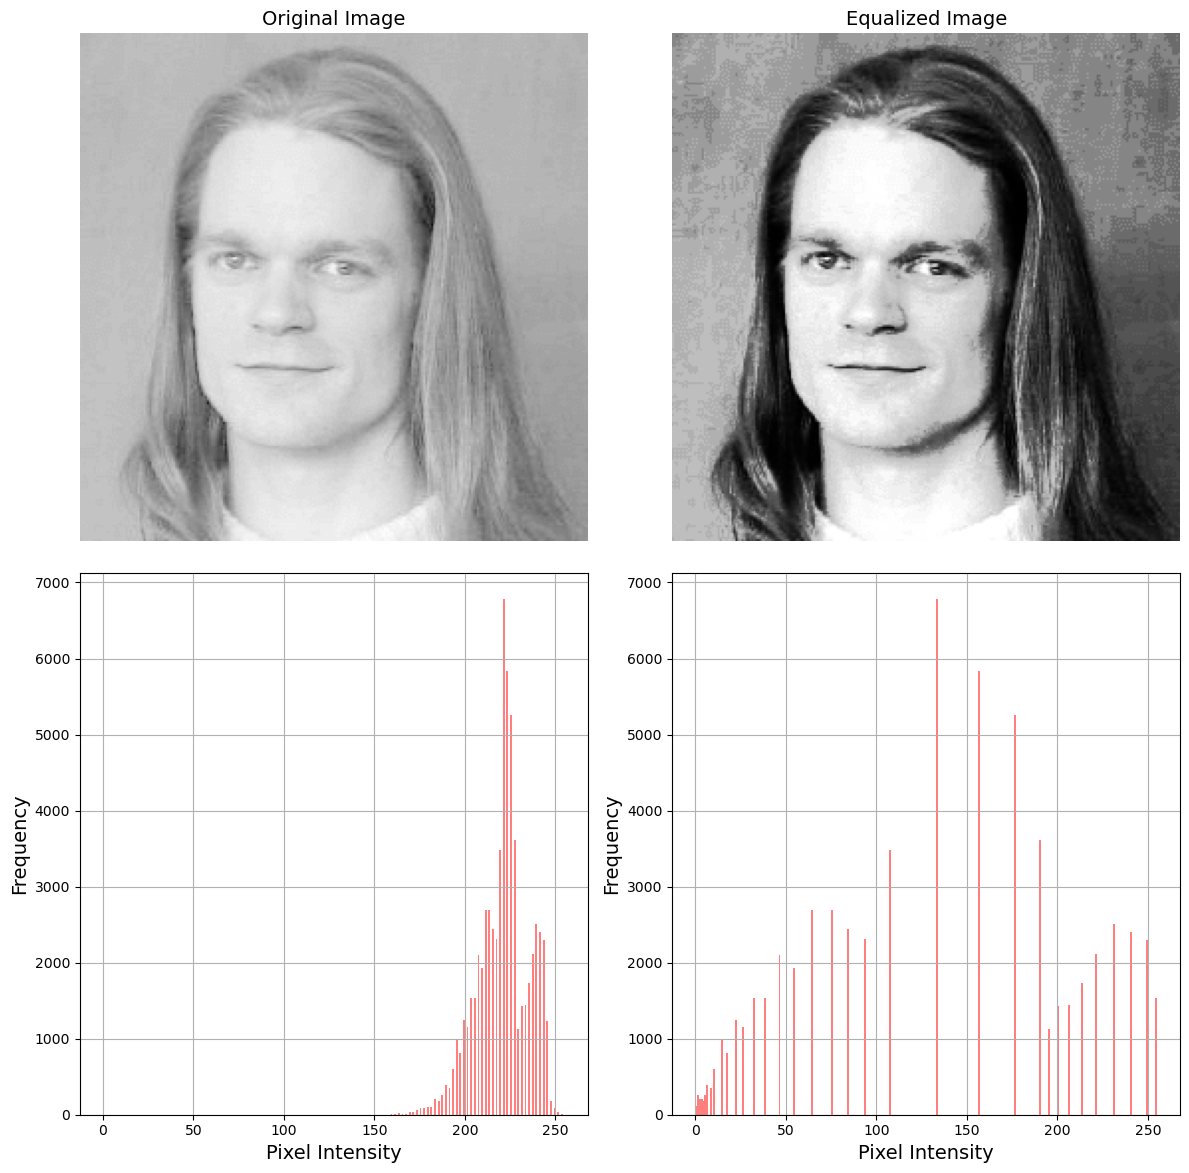

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the full path to the image file
image_path = r"C:\Users\seany\Downloads\Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png"

# Load the Lena image
lena_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if lena_image is None:
    print("Error: Unable to load the image.")
else:
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(lena_image)

    # Plot the original and equalized images side by side with histograms below each image
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Plot the original image
    axes[0, 0].imshow(lena_image, cmap='gray')
    axes[0, 0].set_title('Original Image',fontsize=14)
    axes[0, 0].axis('off')

    # Plot histograms of the original image below
    hist_bins = np.arange(256)
    axes[1, 0].hist(lena_image.ravel(), bins=hist_bins, color='r', alpha=0.5)
    axes[1, 0].set_ylabel('Frequency',fontsize=14)
    axes[1, 0].set_xlabel('Pixel Intensity',fontsize=14)
    axes[1, 0].grid('off')

    # Plot the equalized image
    axes[0, 1].imshow(equalized_image, cmap='gray')
    axes[0, 1].set_title('Equalized Image', fontsize=14)
    axes[0, 1].axis('off')

    # Plot histograms of the equalized image below
    axes[1, 1].hist(equalized_image.ravel(), bins=hist_bins, color='r', alpha=0.5)
    axes[1, 1].set_ylabel('Frequency',fontsize=14)
    axes[1, 1].set_xlabel('Pixel Intensity',fontsize=14)
    axes[1, 1].grid('off')

    plt.tight_layout()
    plt.show()



In [2]:
import cv2
import numpy as np

img_path = r"C:\Users\seany\Downloads\HT_chessboard.jpg"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2.imshow('edges', edges)

# Apply Hough Transform on the edge-detected image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)  # Adjust the threshold parameter

# Check if lines are detected
if lines is not None:
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
else:
    print("No lines detected.")

cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


## RGB Histogram

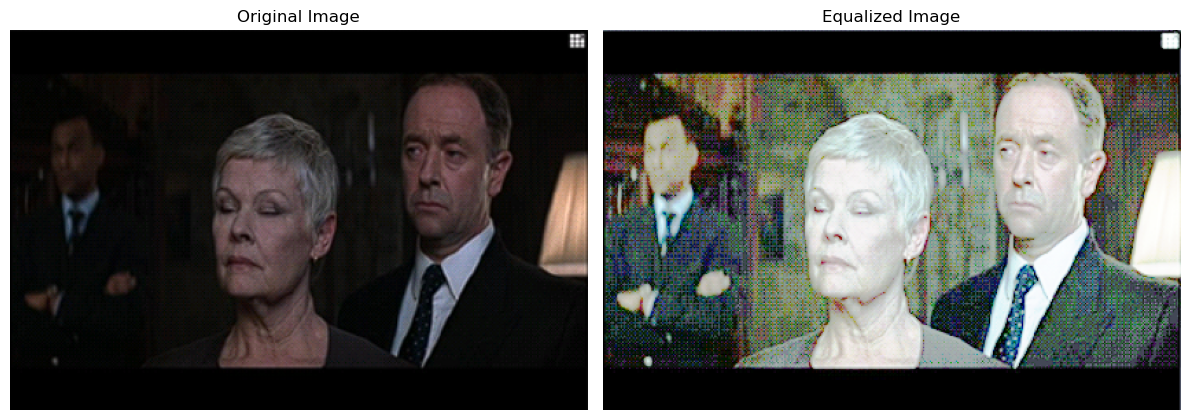

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
img_path = r"C:\Users\seany\Downloads\rgb_hist_img.png"
image = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
r, g, b = cv2.split(image_rgb)

# Equalize the histograms of each color channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Merge the equalized color channels back into an RGB image
equalized_image = cv2.merge([r_eq, g_eq, b_eq])

# Plot the original and equalized images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the equalized image
axes[1].imshow(equalized_image)
axes[1].set_title('Equalized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [16]:
import cv2
import numpy as np
from skimage import exposure

# Load the image
image_path = r"C:\Users\seany\Downloads\rgb_hist_img.png"
image = cv2.imread(image_path)

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its components
h, s, v = cv2.split(image_hsv)

# Normalize the value (V) channel using histogram equalization
v_eq = exposure.equalize_hist(v)

# Scale the value channel back to the original range [0, 255]
v_eq = (v_eq * 255).astype(np.uint8)

# Merge the equalized value channel back into the HSV image
image_hsv_eq = cv2.merge([h, s, v_eq])

# Convert the equalized HSV image back to BGR color space
equalized_image = cv2.cvtColor(image_hsv_eq, cv2.COLOR_HSV2BGR)

# Display the original and equalized images
cv2.imshow("Original Image", image)
cv2.imshow("Equalized Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
import cv2
import numpy as np
from skimage import exposure

# Load the image
image_path = r"C:\Users\seany\Downloads\rgb_hist_img.png"
image = cv2.imread(image_path)

# Convert the image to HSL color space
image_hsl = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

# Split the HSL image into its components
h, l, s = cv2.split(image_hsl)

# Normalize the lightness (L) channel using histogram equalization
l_eq = exposure.equalize_hist(l)

# Scale the lightness channel back to the original range [0, 255]
l_eq = (l_eq * 255).astype(np.uint8)

# Merge the equalized lightness channel back into the HSL image
image_hsl_eq = cv2.merge([h, l_eq, s])

# Convert the equalized HSL image back to BGR color space
equalized_image = cv2.cvtColor(image_hsl_eq, cv2.COLOR_HLS2BGR)

# Display the original and equalized images
cv2.imshow("Original Image", image)
cv2.imshow("Equalized Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()